(4097, 201) (88200,) 0
(4097, 201) (88200,) 1
(4097, 201) (88200,) 2
(4097, 201) (88200,) 3
(4097, 201) (88200,) 4
(4097, 201) (88200,) 5
(4097, 201) (88200,) 6
(4097, 201) (88200,) 7
(4097, 201) (88200,) 8
(4097, 201) (88200,) 9
(4097, 201) (88200,) 10
(4097, 201) (88200,) 11
(4097, 201) (88200,) 12
(4097, 201) (88200,) 13
(4097, 201) (88200,) 14
(4097, 201) (88200,) 15
(4097, 201) (88200,) 16
(4097, 201) (88200,) 17
(4097, 201) (88200,) 18
(4097, 201) (88200,) 19
(4097, 201) (88200,) 20
(4097, 201) (88200,) 21
(4097, 201) (88200,) 22
(4097, 201) (88200,) 23
(4097, 201) (88200,) 24
(4097, 201) (88200,) 25
(4097, 201) (88200,) 26
(4097, 201) (88200,) 27
(4097, 201) (88200,) 28
(4097, 201) (88200,) 29
(4097, 201) (88200,) 30
(4097, 201) (88200,) 31
(4097, 201) (88200,) 32
(4097, 201) (88200,) 33
(4097, 201) (88200,) 34
(4097, 201) (88200,) 35
(4097, 201) (88200,) 36
(4097, 201) (88200,) 37
(4097, 201) (88200,) 38
(4097, 201) (88200,) 39
(4097, 201) (88200,) 40
(4097, 201) (88200,) 41
(4

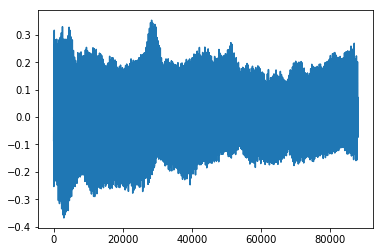

In [18]:
import scipy
import librosa
import numpy as np
import soundfile  as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

frame_period = 10
_NFFT_ = 8192
HOP_LEN = int(44100/(1000/frame_period))
def griffin_lim(stftm_matrix, shape, min_iter=20, max_iter=50, delta=20):
    y = np.random.random(shape)
    y_iter = []

    for i in range(max_iter):
        if i >= min_iter and (i - min_iter) % delta == 0:
            y_iter.append((y, i))
        stft_matrix = librosa.core.stft(y,n_fft=_NFFT_,win_length = 8192, hop_length=HOP_LEN)
        print(stft_matrix.shape,y.shape,i)
        stft_matrix = stftm_matrix * stft_matrix / np.abs(stft_matrix)
        y = librosa.core.istft(stft_matrix,hop_length=HOP_LEN)
        
    return y


x,fs = sf.read('my_a.wav')
sp = librosa.core.stft(x,n_fft=_NFFT_,win_length = 8192, hop_length=HOP_LEN)
abs_x = np.abs(sp)
y = griffin_lim(abs_x, x.shape)
plt.plot(y)
plt.show()
ipd.Audio(y, rate=fs)

In [12]:
x.shape

(88200,)

In [3]:
print(abs_x.shape,x.shape)
librosa.core.stft(y,n_fft=_NFFT_,win_length = 8192, hop_length=int(44100/(1000/frame_period)))

(1025, 173) (88200,)


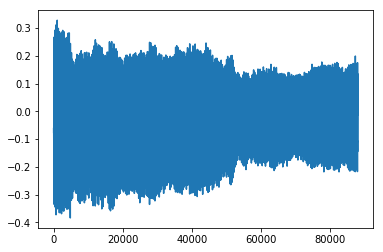

In [22]:
plt.plot(x)
plt.show()